

# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.6 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation using metrics](#section5)<br>
    - 5.1 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Handling Categorical Features](#section7)<br>

<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [2]:
data= pd.read_csv("D:\Download\Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data = data.iloc[:,1:]
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:xlabel='newspaper', ylabel='Density'>

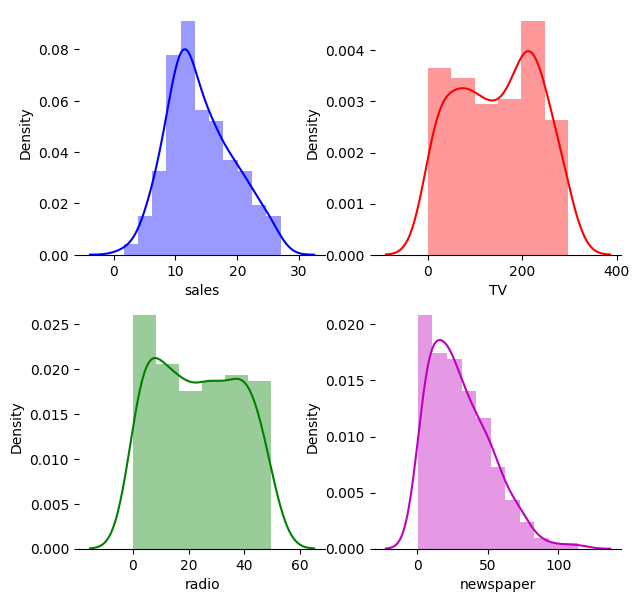

In [7]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])
sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])



__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

### Is there a relationship between sales and spend various advertising channels?

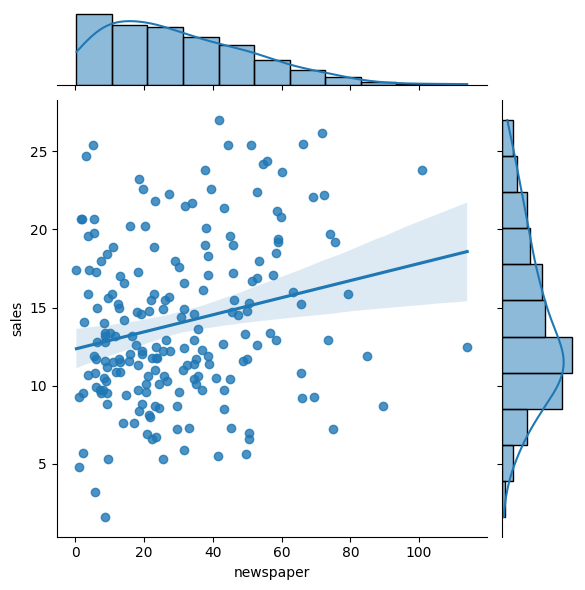

In [8]:
sns.jointplot(x= "newspaper", y= "sales", data=data, kind='reg')

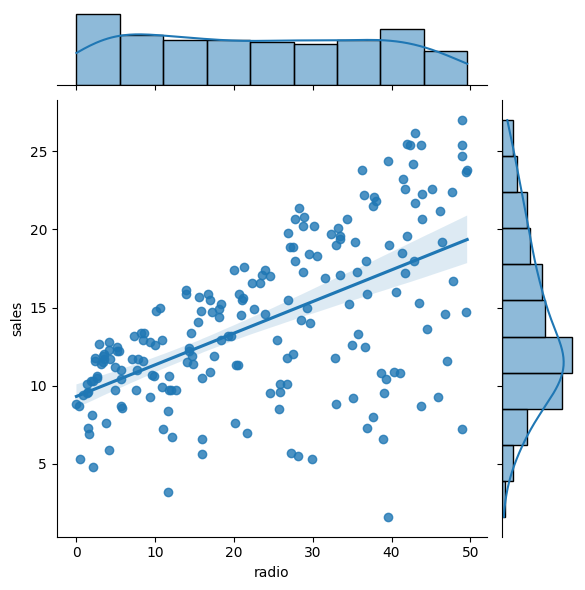

In [9]:
JG2 = sns.jointplot(x= "radio", y= "sales", data=data, kind='reg')

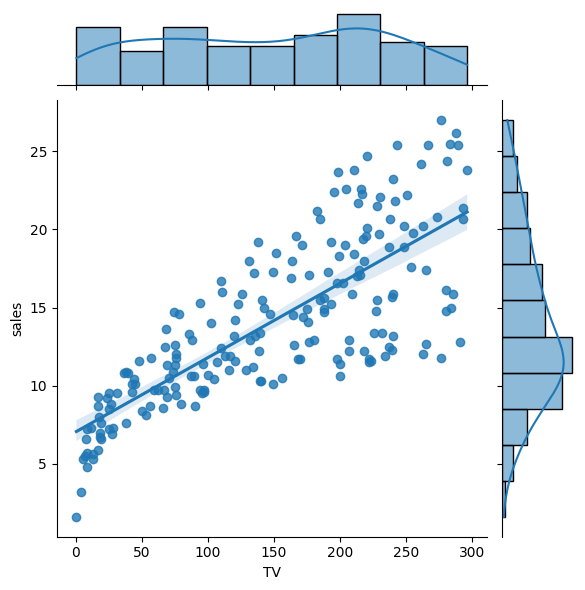

In [10]:
JG3 = sns.jointplot(x= "TV", y= "sales", data=data, kind='reg')

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


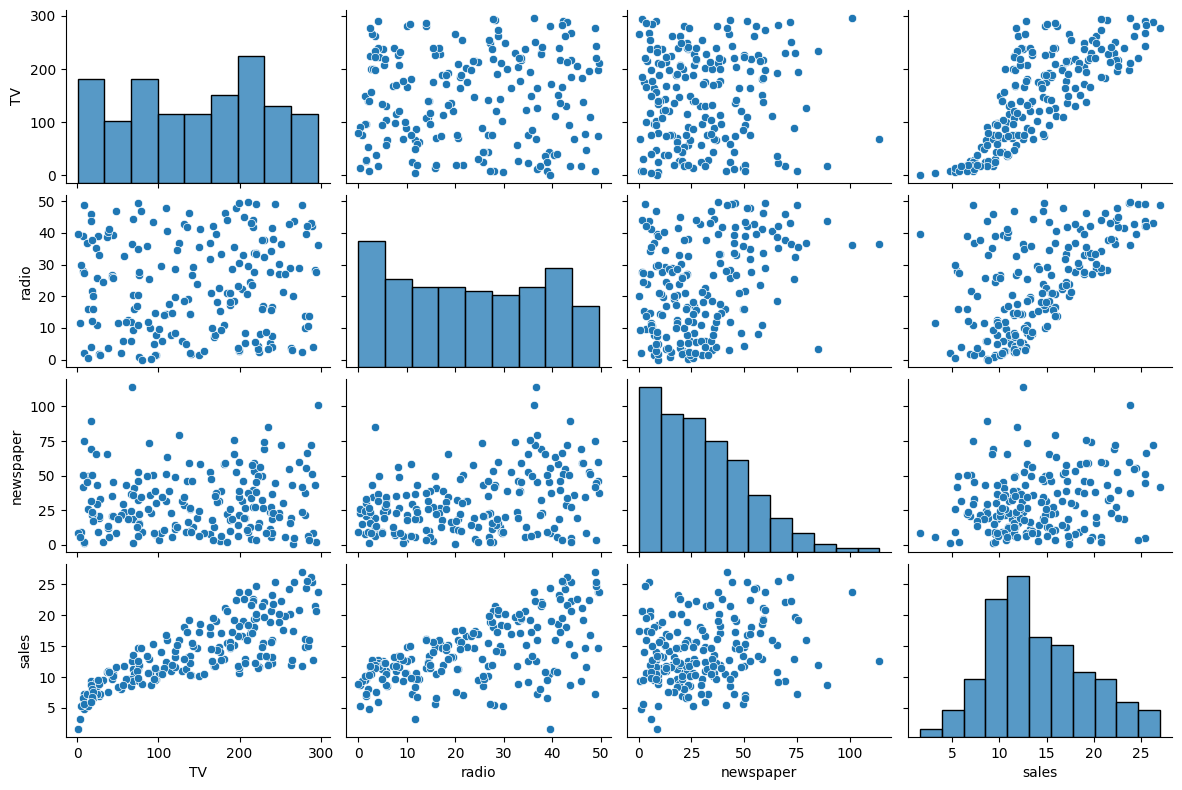

In [11]:
sns.pairplot(data, size = 2, aspect = 1.5)

c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


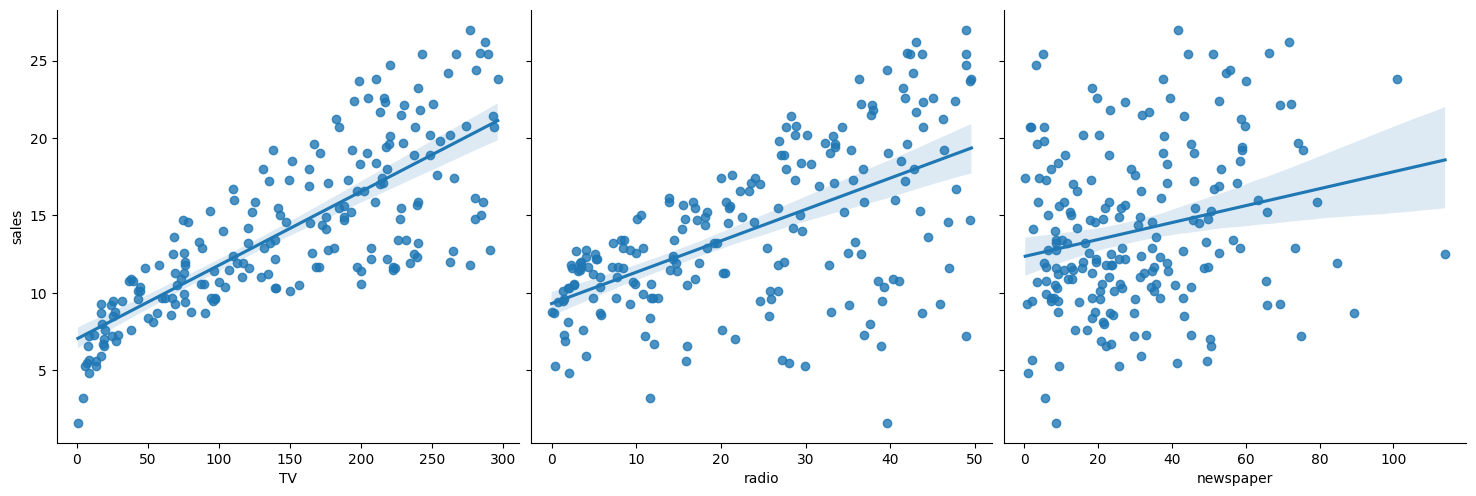

In [12]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [13]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


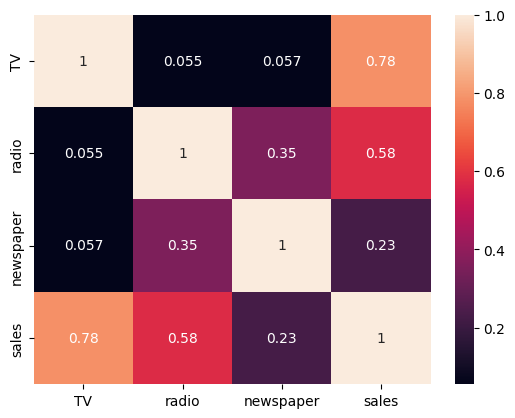

In [14]:
sns.heatmap( data.corr(), annot=True );

__Observation__

- The diagonal of the above matrix shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id = sectionassumptions></a>

#### 4.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>

### 4.2 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [15]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [17]:
data1 # Output of the transformation is an array. We need to convert the array to a Data Frame for further analysis.

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [18]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [19]:
#We will provide column names
data.columns = ['TV','radio','newspaper', 'sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [20]:
data_v2 = data.copy() # Making a copy of the data for future use.

In [21]:
feature_cols = ['TV','radio','newspaper']
X= data[feature_cols]

In [22]:
X.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


- Checking the type and shape of X.

In [23]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [24]:
y= data.sales
y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

- Check the type and shape of y

In [25]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [26]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X,y, test_size=0.20, random_state=1)

In [27]:
X_train, X_test, y_train, y_test = split(X,y)
print('Train cases as below')
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('\nTest cases as below')
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


<a id=section404></a>

### 4.4 Linear regression in scikit-learn

In [28]:
def linear_reg(X, y, gridsearch = False):
    X_train, X_test, y_train,y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg= LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train)
    
    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}
        linreg= GridSearchCV(linreg, parameters, cv=10, refit=True)
        linreg.fit(X_train, y_train) # fit the model to the training data( learn the coefficients)
        print("Mean Cross-validated score of the best estimator: ", linreg.best_score_)
        
        y_pred_test = linreg.predict(X_test) #make predictions on the testing set
        
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)) # compute the RMSE of our prediction
        
        print('RMSE for the test set is {}'.format(RMSE_test))
    return linreg


### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents: 8

In [29]:
X = data[feature_cols]
y=data.sales
linreg = linear_reg(X,y)

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [30]:
print('Intercept:' , linreg.intercept_) #Print the intercept
print('Coefficients: ', linreg.coef_)

Intercept: 0.0011620874606384987
Coefficients:  [0.77081214 0.50806629 0.01079522]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [31]:
feature_cols.insert(0,'Intercept')

In [32]:
coef = linreg.coef_.tolist()
coef

[0.7708121379125102, 0.5080662902756097, 0.010795215187608953]

In [33]:
coef.insert(0, linreg.intercept_)

In [34]:
coef

[0.0011620874606384987,
 0.7708121379125102,
 0.5080662902756097,
 0.010795215187608953]

In [35]:
eq1 = zip(feature_cols, coef)

In [36]:
eq1

In [37]:
for c1,c2 in eq1:
    print(c1, c2)

Intercept 0.0011620874606384987
TV 0.7708121379125102
radio 0.5080662902756097
newspaper 0.010795215187608953


__y = 0.00116 + 0.7708 `*` TV + 0.508 `*` radio + 0.010 `*` newspaper__

<a id=section406></a>

### 4.6 Using the Model for Prediction

In [38]:
y_pred_train = linreg.predict(X_train) # making predictions on the training set

In [39]:
y_pred_test = linreg.predict(X_test) #making predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [41]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [42]:
print('MAE for the training set is {}'.format(MAE_train))
print('MAE for the test set is {}'.format(MAE_test))

MAE for the training set is 0.25533224187771947
MAE for the test set is 0.19987243199696375


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [43]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for the training set is {}'.format(MSE_train))
print('MSE for the test set is {}'.format(MSE_test))

MSE for the training set is 0.11138075570325359
MSE for the test set is 0.07353999839228302


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [44]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for the training set is {}'.format(RMSE_train))
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the training set is 0.3337375551286573
RMSE for the test set is 0.27118259234744957


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### 5.1 Model Evaluation using Rsquared value.

In [45]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train - yhat)**2)
SS_Total = sum((y_train - np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.8959372632325174

In [46]:
adjusted_r_squared = 1 - (1- r_squared)* (len(y_train)-1)/ (len(y_train)- 1 - X_train.shape[1])

In [47]:
print(r_squared, adjusted_r_squared)

0.8959372632325174 0.8939360567562197


<a id=section6></a>

## 6. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"newspaper"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.
- Also Applying __gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [48]:
feature_cols = ['TV','radio']
X = data[feature_cols]
y= data.sales
linreg = linear_reg(X,y,gridsearch=True)

Mean Cross-validated score of the best estimator:  0.8867227748515891
RMSE for the test set is 0.26864510532729846


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.271182__.<br/>
- _After_ discarding 'newspaper' column, RMSE comes to be __0.268675__.<br/>
    - As you can see there is __no significant improvement__ in the quality, therefore, the 'newspaper' column shouldn't be discarded. But if in some other case if there is significant decrease in the RMSE, then you must discard that feature.
- Give a try to other __features__ and check the RMSE score for each one.

<a id=section7></a>

## 7.  Handling Categorical Features

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban** :

In [50]:
np.random.seed(123456) # set a seed for reproducibility
nums = np.random.rand(len(data))  # 200 numbers between 0 to 1 distributed randomly
print(len(nums))
mask_suburban = (nums >0.33) & (nums <0.66) 
mask_urban = nums>0.66


200


In [51]:
data['Area'] ='rural' #0 to 200
data.loc[mask_suburban,'Area'] = 'suburban'
data.loc[mask_urban,'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
0,0.969852,0.981522,1.778945,1.552053,rural
1,-1.197376,1.082808,0.669579,-0.696046,urban
2,-1.516155,1.528463,1.783549,-0.907406,rural
3,0.052050,1.217855,1.286405,0.860330,urban
4,0.394182,-0.841614,1.281802,-0.215683,suburban


In [52]:
#Creating 3 dummy variables using get_Dummies
area_dummies = pd.get_dummies(data.Area, prefix='Area')

area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [53]:
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first= True)
area_dummies.head()

,Area_suburban,Area_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0


Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

In [54]:
# concetanate the dummy variables onto the DataFrame.
data = pd.concat([data,area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.552053,rural,0,0
1,-1.197376,1.082808,0.669579,-0.696046,urban,0,1
2,-1.516155,1.528463,1.783549,-0.907406,rural,0,0
3,0.052050,1.217855,1.286405,0.860330,urban,0,1
4,0.394182,-0.841614,1.281802,-0.215683,suburban,1,0


In [55]:
feature_cols = ['TV','radio','newspaper','Area_suburban','Area_urban'] 
X = data[feature_cols]
y=data.sales
linreg= linear_reg(X,y)

In [56]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()

In [57]:
feature_cols

['Intercept', 'TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']

In [58]:
coef

[0.7691747677616425,
 0.5059681015391153,
 0.011097353326063208,
 -0.031172284238361436,
 0.04181960230726799]

In [59]:
coef.insert(0, linreg.intercept_)

In [60]:
coef

[-0.0021853599197541873,
 0.7691747677616425,
 0.5059681015391153,
 0.011097353326063208,
 -0.031172284238361436,
 0.04181960230726799]

In [61]:
eq1 = zip(feature_cols, coef)

In [62]:
for c1, c2 in eq1:
    print(c1,c2)

Intercept -0.0021853599197541873
TV 0.7691747677616425
radio 0.5059681015391153
newspaper 0.011097353326063208
Area_suburban -0.031172284238361436
Area_urban 0.04181960230726799


__y = - 0.00218 + 0.7691 `*` TV + 0.505 `*` radio + 0.011 `*` newspaper - 0.0311 `*` Area_suburban + 0.0418 `*` Area_urban__<br/>

<a id=section8></a>

## Handling Categorical Data V2.0

In [63]:
data_v2.head() # Choosing this version copied from Data to perform 2nd version of Categorical Data Handling


,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [64]:
np.random.seed(123456) # set a seed for reproducibility
nums = np.random.rand(len(data_v2))  # 200 numbers between 0 to 1 distributed randomly
print(len(nums))
mask_suburban = (nums >0.33) & (nums <0.66) 
mask_urban = nums>0.66
data_v2['Area'] ='rural' #0 to 200
data_v2.loc[mask_suburban,'Area'] = 'suburban'
data_v2.loc[mask_urban,'Area'] = 'urban'
data_v2.head()


200


,TV,radio,newspaper,sales,Area
0,0.969852,0.981522,1.778945,1.552053,rural
1,-1.197376,1.082808,0.669579,-0.696046,urban
2,-1.516155,1.528463,1.783549,-0.907406,rural
3,0.052050,1.217855,1.286405,0.860330,urban
4,0.394182,-0.841614,1.281802,-0.215683,suburban


<AxesSubplot:xlabel='Area'>

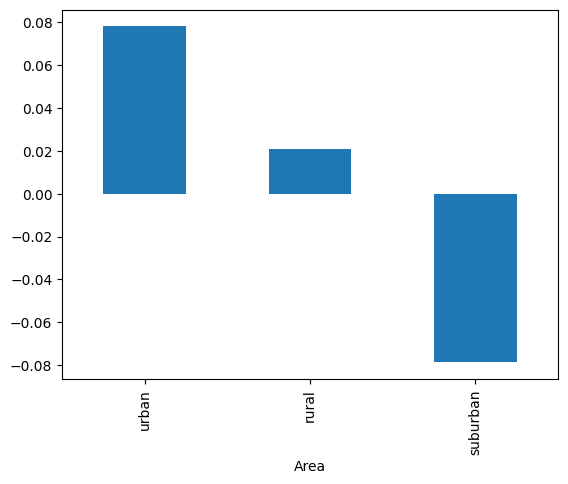

In [65]:
data_v2.groupby(['Area'])['sales'].mean().sort_values(ascending=False).plot(kind='bar')

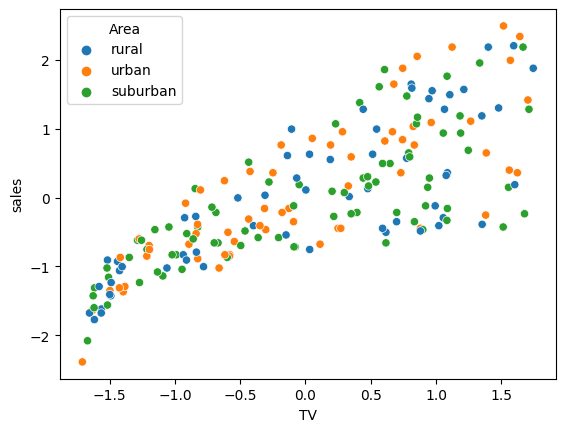

In [66]:
a= sns.scatterplot(x='TV',y='sales',data=data_v2, hue='Area')

In [67]:
features=['TV','radio','newspaper','Area']
cat_col=['Area']  # Defining the categorical column


In [68]:
data_with_dummies = pd.get_dummies(data_v2, columns=cat_col, drop_first=True)
data_with_dummies.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.552053,0,0
1,-1.197376,1.082808,0.669579,-0.696046,0,1
2,-1.516155,1.528463,1.783549,-0.907406,0,0
3,0.052050,1.217855,1.286405,0.860330,0,1
4,0.394182,-0.841614,1.281802,-0.215683,1,0


In [69]:
from sklearn.linear_model import LinearRegression
feature_cols=['TV','radio','newspaper','Area_suburban','Area_urban']
X=data_with_dummies[feature_cols]
y=data_with_dummies.sales
lr_model_cat= LinearRegression()

In [70]:
lr_model_cat.fit(X,y)

LinearRegression()

In [71]:
y_pred_cat = lr_model_cat.predict(X) # Actual target value is y.

In [72]:
pd.DataFrame((lr_model_cat.coef_).T, index=X.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients', ascending=False)

,Co-efficients
TV,0.753685
radio,0.533883
Area_urban,0.048713
newspaper,-0.004250
Area_suburban,-0.022652


In [73]:
print('Intercept: ',lr_model_cat.intercept_)

Intercept:  -0.006510303929821476


__y =  -0.0065 + 0.753 `*` TV + 0.533 `*` radio - 0.004 `*` newspaper - 0.0226 `*` Area_suburban + 0.048 `*` Area_urban__<br/>

ORIGINAL EQUATION


In [74]:
data_with_dummies['predictions'] = y_pred_cat


In [75]:
data_with_dummies

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions
0,0.969852,0.981522,1.778945,1.552053,0,0,1.240911
1,-1.197376,1.082808,0.669579,-0.696046,0,1,-0.284995
2,-1.516155,1.528463,1.783549,-0.907406,0,0,-0.340774
3,0.052050,1.217855,1.286405,0.860330,0,1,0.726157
4,0.394182,-0.841614,1.281802,-0.215683,1,0,-0.186844
...,...,...,...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053,1,0,-1.689050
196,-0.617035,-1.240003,-1.033598,-0.830548,0,1,-1.080471
197,0.349810,-0.942899,-1.111852,-0.234898,1,0,-0.264188
198,1.594565,1.265121,1.640850,2.205347,0,0,1.863744


In [76]:
data_with_dummies['error'] = data_with_dummies['sales'] - data_with_dummies['predictions']

In [77]:
data_with_dummies['error'].describe()

count    2.000000e+02
mean     2.442491e-17
std      3.200047e-01
min     -1.734394e+00
25%     -1.652220e-01
50%      5.359467e-02
75%      2.261529e-01
max      4.980469e-01
Name: error, dtype: float64

<AxesSubplot:title={'center':'Actual vs Predicted'}, xlabel='sales', ylabel='predictions'>

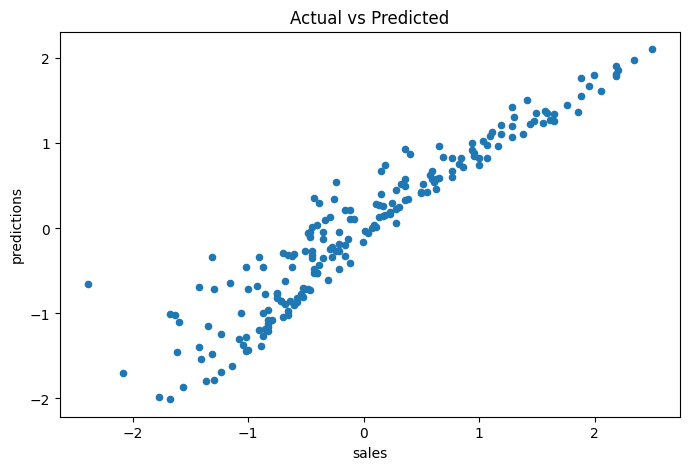

In [78]:
data_with_dummies.plot.scatter(x='sales',y='predictions',\
                              figsize=(8,5), title='Actual vs Predicted')

c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='error', ylabel='Density'>

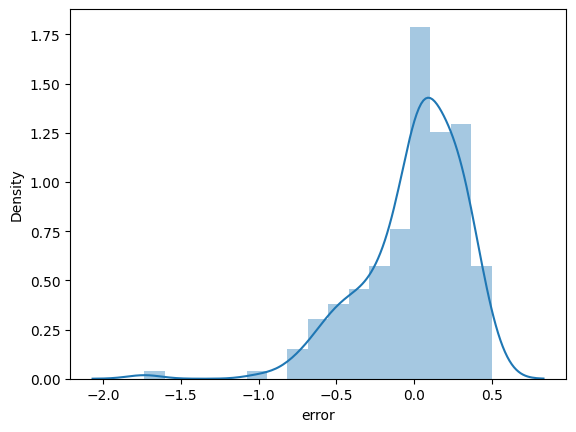

In [79]:
sns.distplot(data_with_dummies['error'])

<AxesSubplot:title={'center':'Actual vs Predicted'}, xlabel='sales', ylabel='error'>

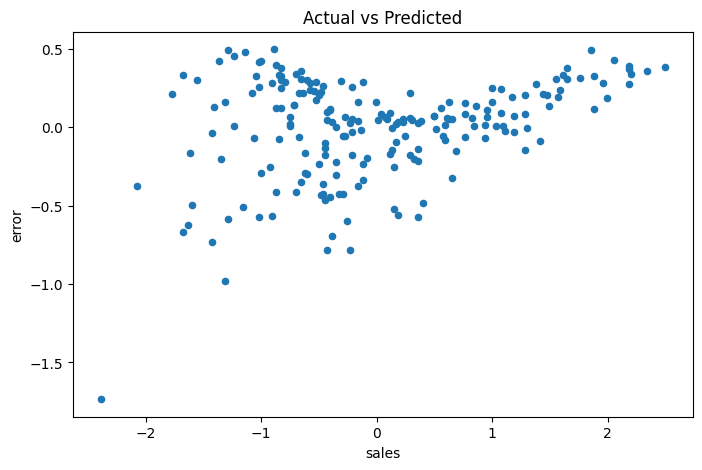

In [80]:
data_with_dummies.plot.scatter(x='sales',y='error',\
                              figsize=(8,5), title='Actual vs Predicted')